In [1]:
%pylab inline

import pres_style, os
from PyTools import binner
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [2]:
odir_snr = os.path.expandvars("$master/inputs/tests/Z_migrations_snr/")
odir_rds = os.path.expandvars("$master/inputs/tests/Z_migrations_trim/")

snrs, spec_snr, jpas_snr = [5, 15, 25], [], []
for snr in snrs:
    spec_snr.append(genfromtxt("{}/SPEC_snr{}/dynbas_output.log".format(odir_snr, snr), dtype=None, names=True))
    jpas_snr.append(genfromtxt("{}/JPAS_snr{}/dynbas_output.log".format(odir_snr, snr), dtype=None, names=True))

rdss, spec_rds, jpas_rds = ["0p050", "0p075", "0p100"], [], []
for rds in rdss:
    spec_rds.append(genfromtxt("{}/SPEC_rds{}/dynbas_output.log".format(odir_rds, rds), dtype=None, names=True))
    jpas_rds.append(genfromtxt("{}/JPAS_rds{}/dynbas_output.log".format(odir_rds, rds), dtype=None, names=True))

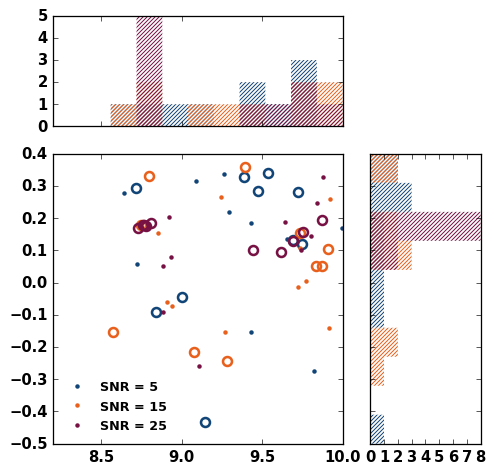

In [3]:
fig, ax1 = subplots()

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("top", 1.2, pad=0.3, sharex=ax1)
ax3 = divider.append_axes("right", 1.2, pad=0.3, sharey=ax1)
plt.setp(ax2.get_xticklabels() + ax3.get_yticklabels(), visible=False)

axs, colors = [ax1, ax2, ax3], []
for i in xrange(len(spec_snr)):
    line, = axs[0].plot(spec_snr[i]["lw_logage"], spec_snr[i]["lw_logz_zo"], ".", mew=0, ms=7,
                        label="SNR = {}".format(snrs[i]))
    colors.append(line.get_color())
    axs[0].plot(jpas_snr[i]["lw_logage"], jpas_snr[i]["lw_logz_zo"], "o", mew=2, ms=7, mfc="none", mec=colors[-1])
    
    axs[1].hist(jpas_snr[i]["lw_logage"], range = (8.4, 10), histtype="stepfilled", hatch="//////", ec=colors[-1],
                fc="none")
    axs[2].hist(jpas_snr[i]["lw_logz_zo"], range = (-0.5, 0.4), histtype="stepfilled", hatch="//////", ec=colors[-1],
                fc="none", orientation="horizontal")

axs[0].legend(loc=0, fontsize=10)

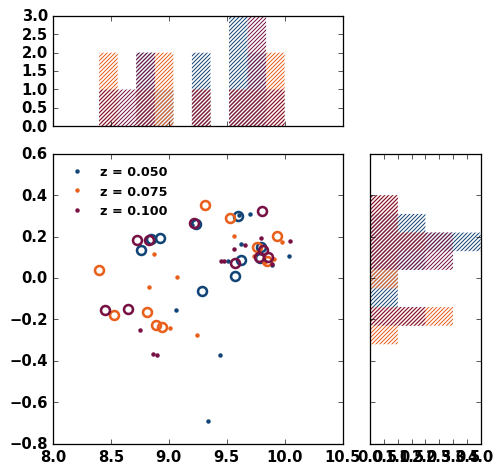

In [4]:
fig, ax1 = subplots()

divider = make_axes_locatable(ax1)
ax2 = divider.append_axes("top", 1.2, pad=0.3, sharex=ax1)
ax3 = divider.append_axes("right", 1.2, pad=0.3, sharey=ax1)
plt.setp(ax2.get_xticklabels() + ax3.get_yticklabels(), visible=False)

axs, colors = [ax1, ax2, ax3], []
for i in xrange(len(spec_rds)):
    line, = axs[0].plot(spec_rds[i]["lw_logage"], spec_rds[i]["lw_logz_zo"], ".", mew=0, ms=7,
                        label="z = {}".format(rdss[i]).replace("p", "."))
    colors.append(line.get_color())
    axs[0].plot(jpas_rds[i]["lw_logage"], jpas_rds[i]["lw_logz_zo"], "o", mew=2, ms=7, mfc="none", mec=colors[-1])
    
    axs[1].hist(jpas_rds[i]["lw_logage"], range = (8.4, 10), histtype="stepfilled", hatch="//////", ec=colors[-1],
                fc="none")
    axs[2].hist(jpas_rds[i]["lw_logz_zo"], range = (-0.5, 0.4), histtype="stepfilled", hatch="//////", ec=colors[-1],
                fc="none", orientation="horizontal")

axs[0].legend(loc=0, fontsize=10)